# Zindi Mobile Money and Financial Inclusion in Tanzania challenge
The train dataset contains demographic information and what financial services are used by approximately 10,000 individuals across Tanzania. This data was extracted from the FSDT Finscope 2017 survey and prepared specifically for this challenge. More about the Finscope survey here.

Each individual is classified into four mutually exclusive categories:

- No_financial_services: Individuals who do not use mobile money, do not save, do not have credit, and do not have insurance
- Other_only: Individuals who do not use mobile money, but do use at least one of the other financial services (savings, credit, insurance)
- Mm_only: Individuals who use mobile money only
- Mm_plus: Individuals who use mobile money and also use at least one of the other financial services (savings, credit, insurance) Financial Access Map

This dataset is the geospatial mapping of all cash outlets in Tanzania in 2012. Cash outlets in this case included commercial banks, community banks, ATMs, microfinance institutions, mobile money agents, bus stations and post offices. This data was collected by FSDT.

In [1]:
# Loading in required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
!{sys.executable} -m pip install folium --user
import folium
from folium.plugins import MarkerCluster

/bin/sh: 1: {sys.executable}: not found


## Instruction 1
1. Examine the dataset. Are there any missing observations or columns where the data do not seem valid?

In [2]:
# CODE for instruction 1
# Reading in the data
mob_money = pd.read_csv("training.csv")
mob_money.head()

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,...,Q17,Q18,Q19,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
0,5086,98,2,3,1,1,2,2,0,0,...,-1,4,4,-4.460442,29.811396,0,0,0,0,0
1,1258,40,1,1,3,5,1,1,1,0,...,4,1,4,-6.176438,39.244871,1,1,1,0,3
2,331,18,2,4,6,3,2,1,0,0,...,-1,1,1,-6.825702,37.652798,1,0,0,0,2
3,6729,50,1,1,3,1,1,1,0,0,...,-1,1,4,-3.372049,35.808307,1,0,1,0,3
4,8671,34,1,1,1,1,2,1,0,1,...,-1,1,4,-7.179645,31.039095,1,1,0,1,3


In [3]:
mob_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7094 entries, 0 to 7093
Data columns (total 37 columns):
ID                             7094 non-null int64
Q1                             7094 non-null int64
Q2                             7094 non-null int64
Q3                             7094 non-null int64
Q4                             7094 non-null int64
Q5                             7094 non-null int64
Q6                             7094 non-null int64
Q7                             7094 non-null int64
Q8_1                           7094 non-null int64
Q8_2                           7094 non-null int64
Q8_3                           7094 non-null int64
Q8_4                           7094 non-null int64
Q8_5                           7094 non-null int64
Q8_6                           7094 non-null int64
Q8_7                           7094 non-null int64
Q8_8                           7094 non-null int64
Q8_9                           7094 non-null int64
Q8_10                     

In [4]:
mob_money.isnull().sum()

ID                             0
Q1                             0
Q2                             0
Q3                             0
Q4                             0
Q5                             0
Q6                             0
Q7                             0
Q8_1                           0
Q8_2                           0
Q8_3                           0
Q8_4                           0
Q8_5                           0
Q8_6                           0
Q8_7                           0
Q8_8                           0
Q8_9                           0
Q8_10                          0
Q8_11                          0
Q9                             0
Q10                            0
Q11                            0
Q12                            0
Q13                            0
Q14                            0
Q15                            0
Q16                            0
Q17                            0
Q18                            0
Q19                            0
Latitude  

## Instruction 2
2. Get basic descriptive statistics for the dataset.

In [5]:
# CODE for instruction 2
mob_money.describe()

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,...,Q17,Q18,Q19,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
count,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,...,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000
mean,4742.627291,38.239498,1.559910,1.787426,3.060051,2.548915,1.840569,1.397942,0.062165,0.630110,...,-0.431914,1.860164,3.163378,-6.034378,35.354029,0.553989,0.461517,0.432901,0.151255,1.799267
std,2731.120086,16.332148,0.496433,1.165160,1.557779,1.534257,0.366103,0.489508,0.241472,0.482809,...,1.489879,1.351372,1.317691,2.720888,2.899511,0.497112,0.498552,0.495512,0.358322,1.196955
min,1.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,-1.000000,1.000000,1.000000,-11.467463,29.639578,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2397.250000,25.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000,...,-1.000000,1.000000,2.000000,-8.275387,32.935429,0.000000,0.000000,0.000000,0.000000,1.000000
50%,4744.500000,35.000000,2.000000,1.000000,3.000000,3.000000,2.000000,1.000000,0.000000,1.000000,...,-1.000000,1.000000,4.000000,-6.087854,35.073326,1.000000,0.000000,0.000000,0.000000,2.000000
75%,7105.000000,48.000000,2.000000,3.000000,3.000000,4.000000,2.000000,2.000000,0.000000,1.000000,...,-1.000000,4.000000,4.000000,-3.517053,38.351815,1.000000,1.000000,1.000000,0.000000,3.000000
max,9459.000000,100.000000,2.000000,4.000000,8.000000,6.000000,2.000000,2.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,-1.084000,40.258744,1.000000,1.000000,1.000000,1.000000,3.000000


In [6]:
print(mob_money['Q2'].unique())
# list comprehension
mob_money['Q2']= ['Female' if each==2 else 'Male' for each in mob_money['Q2']]
# mob_money['mobile_money_classification']= ['None' if each==0 else 'AtLeastOther' if each==1 else 'AtLeastOther' if each==2 else 'AtLeastOther' for each in mob_money['Q2']]

[2 1]


In [7]:
print(mob_money['Q6'].unique())
mob_money['Q6']= ['No' if each==2 else 'Yes' for each in mob_money['Q6']]

[2 1]


## Instruction 3
3. Create appropriate graphs to visually represent the relationship between financial services accessed (non-mobile, mobile, both) and age, gender, marital status, land ownership and type of income.

#### Mobile Money vs Age 

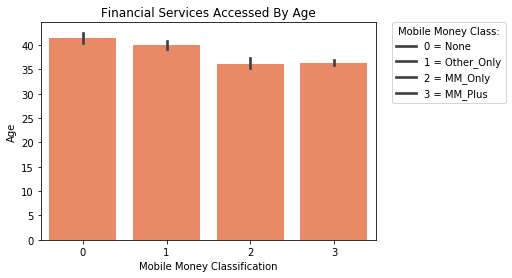

In [20]:
# CODE for instruction 3In [ ]:

bar = sns.barplot(x = 'mobile_money_classification', y = 'Q1', data = mob_money, color = 'coral')
bar.set(xlabel = 'Mobile Money Classification', ylabel = 'Age', title = 'Financial Services Accessed By Age')
plt.legend(title = 'Mobile Money Class:', labels = ['0 = None', '1 = Other_Only','2 = MM_Only', '3 = MM_Plus'], loc="best", bbox_to_anchor=(1.05, 1), borderaxespad=0.)
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Most peole in their mid-thirties, late thirties use mobile money, whereas people who are in their 40s barely use mobile money. This could be due to the lack of technical abilities or interest by the older people, hence younger people are more updated on the usage of mobile money.

#### Mobile Money vs Gender

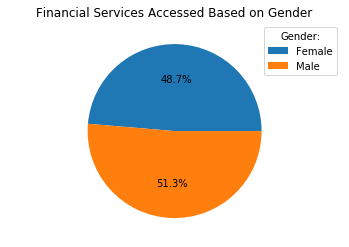

array(['Female', 'Male'], dtype=object)

In [15]:
# newdf  = mob_money[mob_money['mobile_money_classification'] == 3]
piechart = newdf.groupby(newdf['Q2'])['mobile_money_classification'].sum()
plt.axis('equal')
plt.pie(piechart, autopct='%1.1f%%')
plt.title('Financial Services Accessed Based on Gender')
plt.legend(title = 'Gender:', labels = ['Female', 'Male'], loc="best")
plt.show()
mob_money['Q2'].unique()

It seems as though there are more males using mobile money as opposed to females, although the number's are very close. Nothing solid can be concluded about Gender with relation to the usage of Mobile Money, since the pie chart only indicates the total number of males and females that took part in the survey.

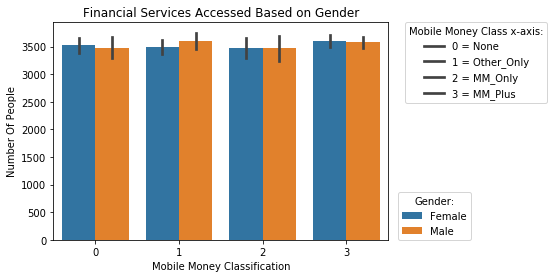

In [16]:
ax = sns.barplot(x = mob_money['mobile_money_classification'], 
                 y = np.arange(7094), 
                 hue = mob_money['Q2'])

ax.set(xlabel = 'Mobile Money Classification', 
       ylabel = 'Number Of People', 
       title = 'Financial Services Accessed Based on Gender')

leg = plt.legend(loc=(1.03,0), title="Gender:")
ax.add_artist(leg)


plt.legend(title = 'Mobile Money Class x-axis:', 
           labels = ['0 = None', '1 = Other_Only','2 = MM_Only', '3 = MM_Plus'], 
           loc="best", 
           bbox_to_anchor=(1.05, 1), 
           borderaxespad=0.)
plt.show()

There seems to be generally more females than males who use mobile money, as well as other forms of money circulation methods. This could be due to the fact that many women have to take care of family and make sure money circulates to their children, and possibly extended family. The majority of men seem to use other forms of money circulation methods except mobile money, which begs the question of whether or not men are equipped with the knowledge and ability of technical services of money.

#### Mobile Money vs Marital Status

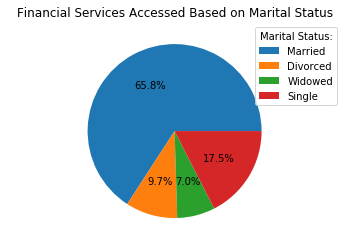

In [17]:
piechart = mob_money.groupby(mob_money['Q3'])['mobile_money_classification'].sum()
plt.axis('equal')
plt.pie(piechart, autopct='%1.1f%%')
plt.title('Financial Services Accessed Based on Marital Status')
plt.legend(title = 'Marital Status:', labels = ['Married','Divorced','Widowed','Single'], loc="best")
plt.show()
# mob_money['Q3']unique()

This graph does not give much information with respect to the usage of mobile money, although, it reflects the number of individuals who took this survey with respect to their marial status. It is quite evident that the number of married people is a vast majority in this particular survey, and the minimum are the widowed and divorced. Now, we need to discover whether or not one's marital status affects their usage of money and circulation method. 

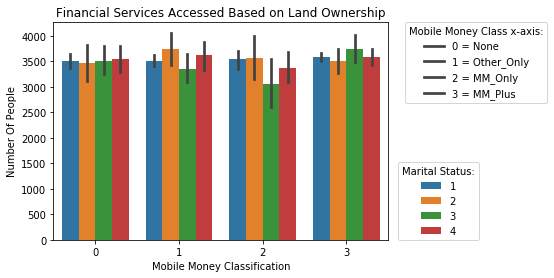

In [19]:
ax = sns.barplot(x = mob_money['mobile_money_classification'], y = np.arange(7094), hue = mob_money['Q3'])
ax.set(xlabel = 'Mobile Money Classification', ylabel = 'Number Of People', title = 'Financial Services Accessed Based on Land Ownership')

leg = plt.legend(loc=(1.03,0), title = 'Marital Status:')
ax.add_artist(leg)


plt.legend(title = 'Mobile Money Class x-axis:', labels = ['0 = None', '1 = Other_Only','2 = MM_Only', '3 = MM_Plus'], loc="best", bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.show()

The Marital Status Legend is as follows:
1. Married
2. Divorced
3. Widowed
4. Single

When we look at the x-axis, we can see how the number of people who use mobile money only are divorced, followed by those who are married. Going back to the other two aspects we previously observed, i.e. Age and Gender, we noticed how most mobile money users are in their mid-to-late thirties, and we also noticed how most of them are female. Now we are seeing that most of them are either divorced or married. This can just simply bring about the conclusion that as women get older, they are faced with many responsibilities, not only of money flow in the family, but as well as taking care of certain needs in the family, which makes sense for most of them to opt into using mobile money, as a form of bringing about some sense of ease with all the amount of responsibilities that need to be taken care of.


#### Mobile Money vs Land Ownership

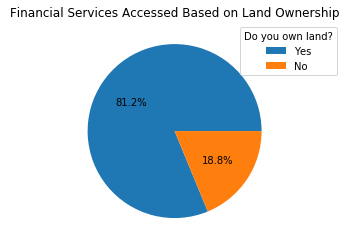

In [25]:
piechart = mob_money.groupby(mob_money['Q6'])['mobile_money_classification'].sum()
plt.axis('equal')
plt.pie(piechart, autopct='%1.1f%%')
plt.title('Financial Services Accessed Based on Land Ownership')
plt.legend(title = 'Do you own land?', labels = ['Yes', 'No'], loc="best")
plt.show()

This piechart only informs us that roughly a proportion of about 81% of the people that took this survey actually own land. Now, we need to undestand the relationship betwen land ownership and usage of mobile money. 

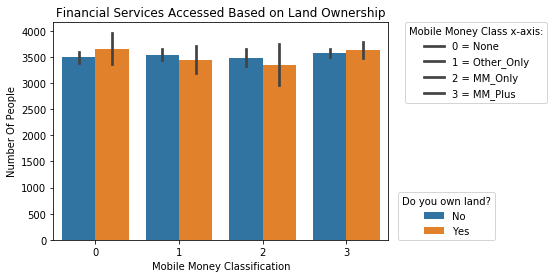

In [23]:
ax = sns.barplot(x = mob_money['mobile_money_classification'], y = np.arange(7094), hue = mob_money['Q6'])
ax.set(xlabel = 'Mobile Money Classification', ylabel = 'Number Of People', title = 'Financial Services Accessed Based on Land Ownership')

leg = plt.legend(loc=(1.03,0), title = 'Do you own land?')
ax.add_artist(leg)


plt.legend(title = 'Mobile Money Class x-axis:', labels = ['0 = None', '1 = Other_Only','2 = MM_Only', '3 = MM_Plus'], loc="best", bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.show()

We are trying to find out whether or not people owning land affects their usage of mobile money. Most people without land ownership actually use mobile money more than those who own land. This could be due to payment of bills such as rent, water and electricity, parking, etc.

#### Mobile Money vs Type of Income

In [26]:
mob_money['total_income'] = mob_money['Q8_1'] + mob_money['Q8_2'] + mob_money['Q8_3'] + mob_money['Q8_4'] + mob_money['Q8_5'] + mob_money['Q8_6'] + mob_money['Q8_7'] + mob_money['Q8_8'] + mob_money['Q8_9'] + mob_money['Q8_10'] + mob_money['Q8_11']
mob_money['total_income'].head()

0    1
1    1
2    1
3    1
4    1
Name: total_income, dtype: int64

##### Salary/Wages Income

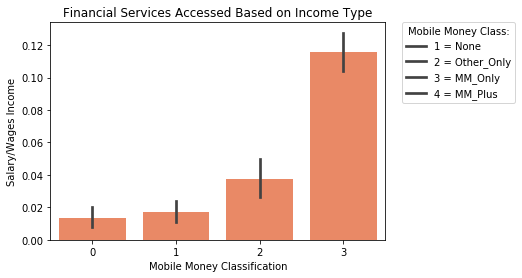

In [27]:
bar = sns.barplot(x = 'mobile_money_classification', y = 'Q8_1', data = mob_money, color = 'coral')
bar.set(xlabel = 'Mobile Money Classification', ylabel = 'Salary/Wages Income', title = 'Financial Services Accessed Based on Income Type')
plt.legend(title = 'Mobile Money Class:', labels = ['1 = None', '2 = Other_Only','3 = MM_Only', '4 = MM_Plus'], loc="best", bbox_to_anchor=(1.05, 1), borderaxespad=0.)
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Most people who earn salaries and wages use mobile money and other forms of money circulation methods. This could be due to them paying bills, debit orders, having flexible lifestyles and taking part in many forms of money circulation schemes.

##### Trading

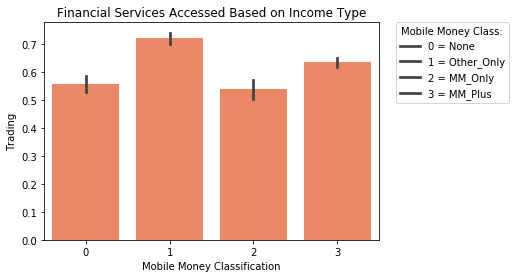

In [28]:
bar = sns.barplot(x = 'mobile_money_classification', y = 'Q8_2', data = mob_money, color = 'coral')
bar.set(xlabel = 'Mobile Money Classification', ylabel = 'Trading', title = 'Financial Services Accessed Based on Income Type')
plt.legend(title = 'Mobile Money Class:', labels = ['0 = None', '1 = Other_Only','2 = MM_Only', '3 = MM_Plus'], loc="best", bbox_to_anchor=(1.05, 1), borderaxespad=0.)
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

One would expect "Traders" to be mostly familiar with mobile money, but from this survey, many traders actually would much rather opt for other forms of mobile money more than mobile money. Traders in Tanzania probably work mostly on cash basis as opposed to mobile money as a form of receiving remunerations for their goods and services. 

##### Service Privision

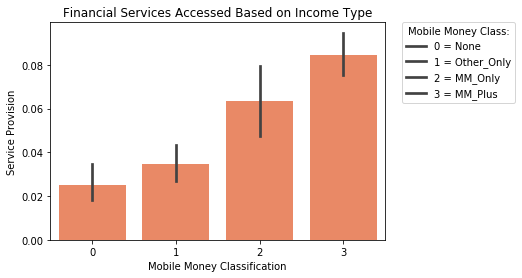

In [29]:
bar = sns.barplot(x = 'mobile_money_classification', y = 'Q8_3', data = mob_money, color = 'coral')
bar.set(xlabel = 'Mobile Money Classification', ylabel = 'Service Provision', title = 'Financial Services Accessed Based on Income Type')
plt.legend(title = 'Mobile Money Class:', labels = ['0 = None', '1 = Other_Only','2 = MM_Only', '3 = MM_Plus'], loc="best", bbox_to_anchor=(1.05, 1), borderaxespad=0.)
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Service providers use mobile money and many other forms. This is probably due to how they receive payments for their services, some customers may prefer to pay cash and others through mobile money services. Also, to make sure they provide efficient services, they would probably need to buy some goods using mobile money services.

##### Piece jobs

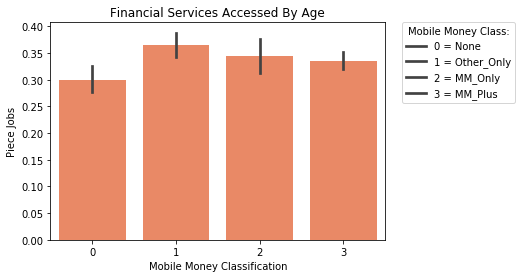

In [30]:
bar = sns.barplot(x = 'mobile_money_classification', y = 'Q8_4', data = mob_money, color = 'coral')
bar.set(xlabel = 'Mobile Money Classification', ylabel = 'Piece Jobs', title = 'Financial Services Accessed By Age')
plt.legend(title = 'Mobile Money Class:', labels = ['0 = None', '1 = Other_Only','2 = MM_Only', '3 = MM_Plus'], loc="best", bbox_to_anchor=(1.05, 1), borderaxespad=0.)  

With piece jobs, one can never be certain of how their money circulation will be like. Hence many people with piece jobs use many other forms as opposed to mobile money. However, a reasonable majority still uses mobile money.

##### Rental Income

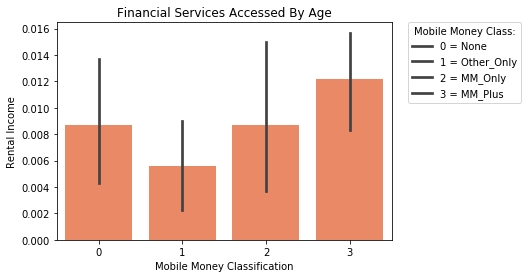

In [40]:
bar = sns.barplot(x = 'mobile_money_classification', y = 'Q8_5', data = mob_money, color = 'coral')
bar.set(xlabel = 'Mobile Money Classification', ylabel = 'Rental Income', title = 'Financial Services Accessed By Age')
plt.legend(title = 'Mobile Money Class:', labels = ['0 = None', '1 = Other_Only','2 = MM_Only', '3 = MM_Plus'], loc="best", bbox_to_anchor=(1.05, 1), borderaxespad=0.)

Many people would prefer to pay rent through mobile, however,others may pay it cash, hence people who earn their income through rent income use mobile money, as well as many other forms of money circulation.

##### Investments

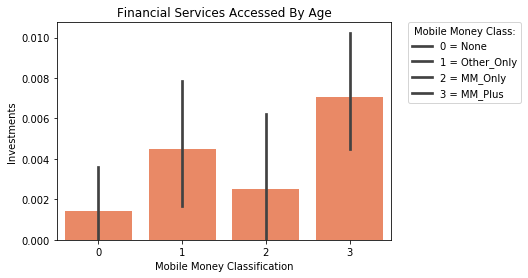

In [32]:
bar = sns.barplot(x = 'mobile_money_classification', y = 'Q8_6', data = mob_money, color = 'coral')
bar.set(xlabel = 'Mobile Money Classification', ylabel = 'Investments', title = 'Financial Services Accessed By Age')
plt.legend(title = 'Mobile Money Class:', labels = ['0 = None', '1 = Other_Only','2 = MM_Only', '3 = MM_Plus'], loc="best", bbox_to_anchor=(1.05, 1), borderaxespad=0.)

A majority of those who make a living from investments use mobile money and other forms of money circulation methods. This makes sense because mobile money should be the main source of usage, with many other forms which they would then use for the purchase of their goods and services.

##### Pension

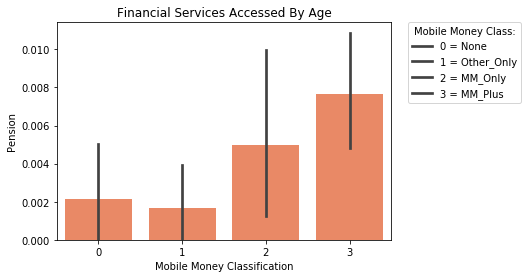

In [33]:
bar = sns.barplot(x = 'mobile_money_classification', y = 'Q8_7', data = mob_money, color = 'coral')
bar.set(xlabel = 'Mobile Money Classification', ylabel = 'Pension', title = 'Financial Services Accessed By Age')
plt.legend(title = 'Mobile Money Class:', labels = ['0 = None', '1 = Other_Only','2 = MM_Only', '3 = MM_Plus'], loc="best", bbox_to_anchor=(1.05, 1), borderaxespad=0.)

A majority of pensioners use mobile money and other forms of money circulation. This is probably due to them using the money for essential needs, thus making debit orders and stop orders to make the circulation of money easier.

##### Social Welfare

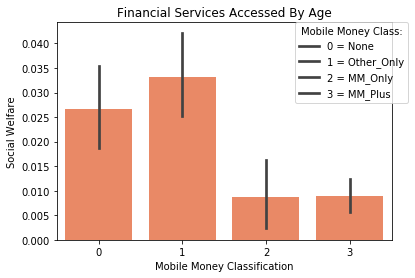

In [34]:
bar = sns.barplot(x = 'mobile_money_classification', y = 'Q8_8', data = mob_money, color = 'coral')
bar.set(xlabel = 'Mobile Money Classification', ylabel = 'Social Welfare', title = 'Financial Services Accessed By Age')
plt.legend(title = 'Mobile Money Class:', labels = ['0 = None', '1 = Other_Only','2 = MM_Only', '3 = MM_Plus'], loc="best", bbox_to_anchor=(1.05, 1), borderaxespad=0.)

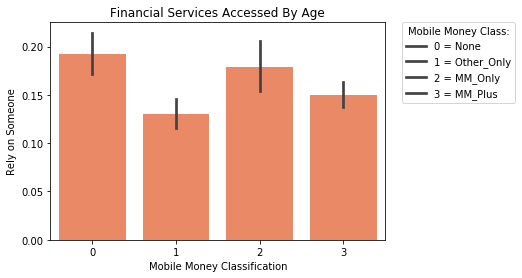

In [35]:
bar = sns.barplot(x = 'mobile_money_classification', y = 'Q8_9', data = mob_money, color = 'coral')
bar.set(xlabel = 'Mobile Money Classification', ylabel = 'Rely on Someone', title = 'Financial Services Accessed By Age')
plt.legend(title = 'Mobile Money Class:', labels = ['0 = None', '1 = Other_Only','2 = MM_Only', '3 = MM_Plus'], loc="best", bbox_to_anchor=(1.05, 1), borderaxespad=0.)

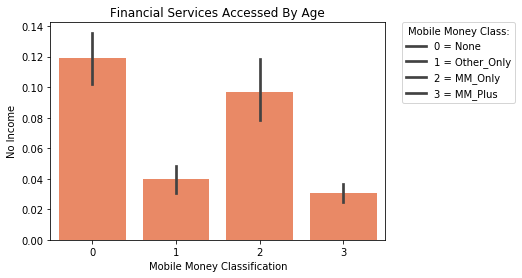

In [36]:
bar = sns.barplot(x = 'mobile_money_classification', y = 'Q8_10', data = mob_money, color = 'coral')
bar.set(xlabel = 'Mobile Money Classification', ylabel = 'No Income', title = 'Financial Services Accessed By Age')
plt.legend(title = 'Mobile Money Class:', labels = ['0 = None', '1 = Other_Only','2 = MM_Only', '3 = MM_Plus'], loc="best", bbox_to_anchor=(1.05, 1), borderaxespad=0.)

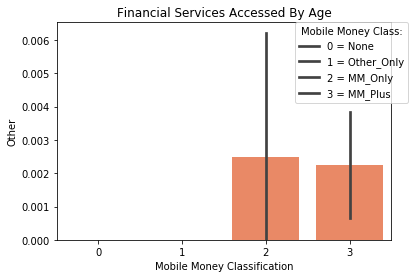

In [37]:
bar = sns.barplot(x = 'mobile_money_classification', y = 'Q8_11', data = mob_money, color = 'coral')
bar.set(xlabel = 'Mobile Money Classification', ylabel = 'Other', title = 'Financial Services Accessed By Age')
plt.legend(title = 'Mobile Money Class:', labels = ['0 = None', '1 = Other_Only','2 = MM_Only', '3 = MM_Plus'], loc="best", bbox_to_anchor=(1.05, 1), borderaxespad=0.)

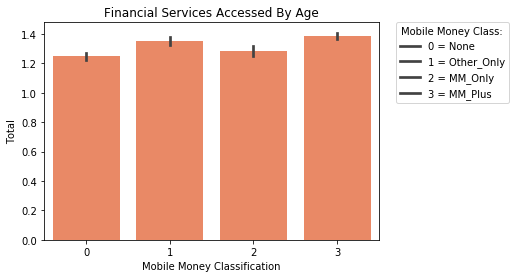

In [38]:
bar = sns.barplot(x = 'mobile_money_classification', y = 'total_income', data = mob_money, color = 'coral')
bar.set(xlabel = 'Mobile Money Classification', ylabel = 'Total', title = 'Financial Services Accessed By Age')
plt.legend(title = 'Mobile Money Class:', labels = ['0 = None', '1 = Other_Only','2 = MM_Only', '3 = MM_Plus'], loc="best", bbox_to_anchor=(1.05, 1), borderaxespad=0.)

## Instruction 4
4. Create appropriate graphs to visually represent the relationship between how often mobile services are used and age, gender, marital status, land ownership and type of income.

In [28]:
# CODE for instruction 4


## Instruction 5
5. Create a map to visually explore geographic distribution of mobile services coverage with respect to type of income.

In [29]:
# CODE for instruction 5
maps = folium.Map(location=[-6.161184, 35.745426], tiles='OpenStreetMap', zoom_start=6)
marker_cluster = MarkerCluster().add_to(maps)
for lat, long in zip(mob_money.Latitude, mob_money.Longitude):
    folium.Marker(location = [lat, long]
    ).add_to(marker_cluster)
maps

## Instruction 6
6. What can you conclude about use of financial services in Tanzania? Which demographic and geographic factors are associated with mobile money use?

In [30]:
# CODE for instruction 6
